In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import seaborn as sns
import plotly.express as px
import pandas as pd
import ast
import math
import random
from scipy.stats import skew
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import pickle

#to display all the graph in the workbook
%matplotlib inline
sns.set_style("whitegrid",{'grid.linestyle': '--'})
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Load  Dataset
# train Data
sales_df = pd.read_csv("/kaggle/input/my-info/train_v2.csv", low_memory=False)
# store Data
store_df = pd.read_csv("/kaggle/input/my-info/store.csv", low_memory=False)

In [4]:
# Dataset First Look
sales_df.head() # sale

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-01-30,5577,616,1,1,0,0
1,2,5,2015-01-30,5919,624,1,1,0,0
2,3,5,2015-01-30,6911,678,1,1,0,0
3,4,5,2015-01-30,13307,1632,1,1,0,0
4,5,5,2015-01-30,5640,617,1,1,0,0


In [5]:
sales_df.tail() # sale

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
66895,864,3,2014-11-26,5156,626,1,1,0,0
66896,865,3,2014-11-26,9337,646,1,1,0,0
66897,866,3,2014-11-26,7973,479,1,1,0,0
66898,867,3,2014-11-26,5391,440,1,1,0,0
66899,868,3,2014-11-26,9478,579,1,1,0,0


In [6]:
store_df.head() # store

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [7]:
store_df.tail() # store

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


# Dataset Rows & Columns count

In [8]:
# Dataset Rows & Columns count
# overall row and columns
overall_number_of_row_and_columns = sales_df.shape
print(overall_number_of_row_and_columns)

(66900, 9)


In [9]:
# Total number of rows in sales
number_of_rows = len(sales_df.index)
print(number_of_rows)

66900


In [10]:
# Total number of columns in sales
number_of_columns = len(sales_df.columns)
print(number_of_columns)

9


In [11]:
# Column names in sales
sales_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [12]:
# overall row and columns in store
overall_number_of_row_and_columns = store_df.shape
print(overall_number_of_row_and_columns)

(1115, 10)


In [13]:
# Total number of rows in store
number_of_rows = len(store_df.index)
print(number_of_rows)

1115


In [14]:
# Total number of columns in store
number_of_columns = len(store_df.columns)
print(number_of_columns)

10


In [15]:
# Column names in store
store_df.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

# Dataset Information


In [16]:
# Dataset Info #sale
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66900 entries, 0 to 66899
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Store          66900 non-null  int64 
 1   DayOfWeek      66900 non-null  int64 
 2   Date           66900 non-null  object
 3   Sales          66900 non-null  int64 
 4   Customers      66900 non-null  int64 
 5   Open           66900 non-null  int64 
 6   Promo          66900 non-null  int64 
 7   StateHoliday   66900 non-null  object
 8   SchoolHoliday  66900 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 4.6+ MB


In [17]:
# checking description of data #sale
sales_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Store,66900.0,557.916622,321.544345,1.0,281.0,557.0,837.0,1115.0
DayOfWeek,66900.0,4.005830,1.962357,1.0,2.0,4.0,6.0,7.0
Sales,66900.0,6338.682167,4365.720737,0.0,3859.0,6301.0,8768.0,37122.0
Customers,66900.0,661.512257,497.418237,0.0,407.0,635.0,887.0,4962.0
Open,66900.0,0.817459,0.386293,0.0,1.0,1.0,1.0,1.0
Promo,66900.0,0.428550,0.494872,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,66900.0,0.180433,0.384551,0.0,0.0,0.0,0.0,1.0


In [18]:
# Dataset Info of store dataset
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [19]:
#checking description of data of store dataset
store_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Store,1115.0,558.000000,322.017080,1.0,279.5,558.0,836.5,1115.0
CompetitionDistance,1112.0,5404.901079,7663.174720,20.0,717.5,2325.0,6882.5,75860.0
CompetitionOpenSinceMonth,761.0,7.224704,3.212348,1.0,4.0,8.0,10.0,12.0
CompetitionOpenSinceYear,761.0,2008.668857,6.195983,1900.0,2006.0,2010.0,2013.0,2015.0
Promo2,1115.0,0.512108,0.500078,0.0,0.0,1.0,1.0,1.0
Promo2SinceWeek,571.0,23.595447,14.141984,1.0,13.0,22.0,37.0,50.0
Promo2SinceYear,571.0,2011.763573,1.674935,2009.0,2011.0,2012.0,2013.0,2015.0


# Duplicate values

In [20]:
# Dataset Duplicate Value count
df2 = sales_df.pivot_table(index = ['Store', 'DayOfWeek', 'Date', 'Customers', 'Open', 'Promo',
        'StateHoliday', 'SchoolHoliday'],)
print(df2)

                                                                            Sales
Store DayOfWeek Date       Customers Open Promo StateHoliday SchoolHoliday       
1     1         2014-12-01 723       1    1     0            0               7380
                2014-12-08 610       1    0     0            0               4884
                2014-12-15 871       1    1     0            0               8069
                2014-12-22 1080      1    0     0            1               9331
                2014-12-29 700       1    0     0            1               6463
...                                                                           ...
1115  7         2014-12-28 0         0    0     0            1                  0
                2015-01-04 0         0    0     0            1                  0
                2015-01-11 0         0    0     0            0                  0
                2015-01-18 0         0    0     0            0                  0
                

# Missing Values

In [21]:
# Missing Values/Null Values Count of sales
sales_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [22]:
# Missing Values/Null Values Count of store
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

<Axes: >

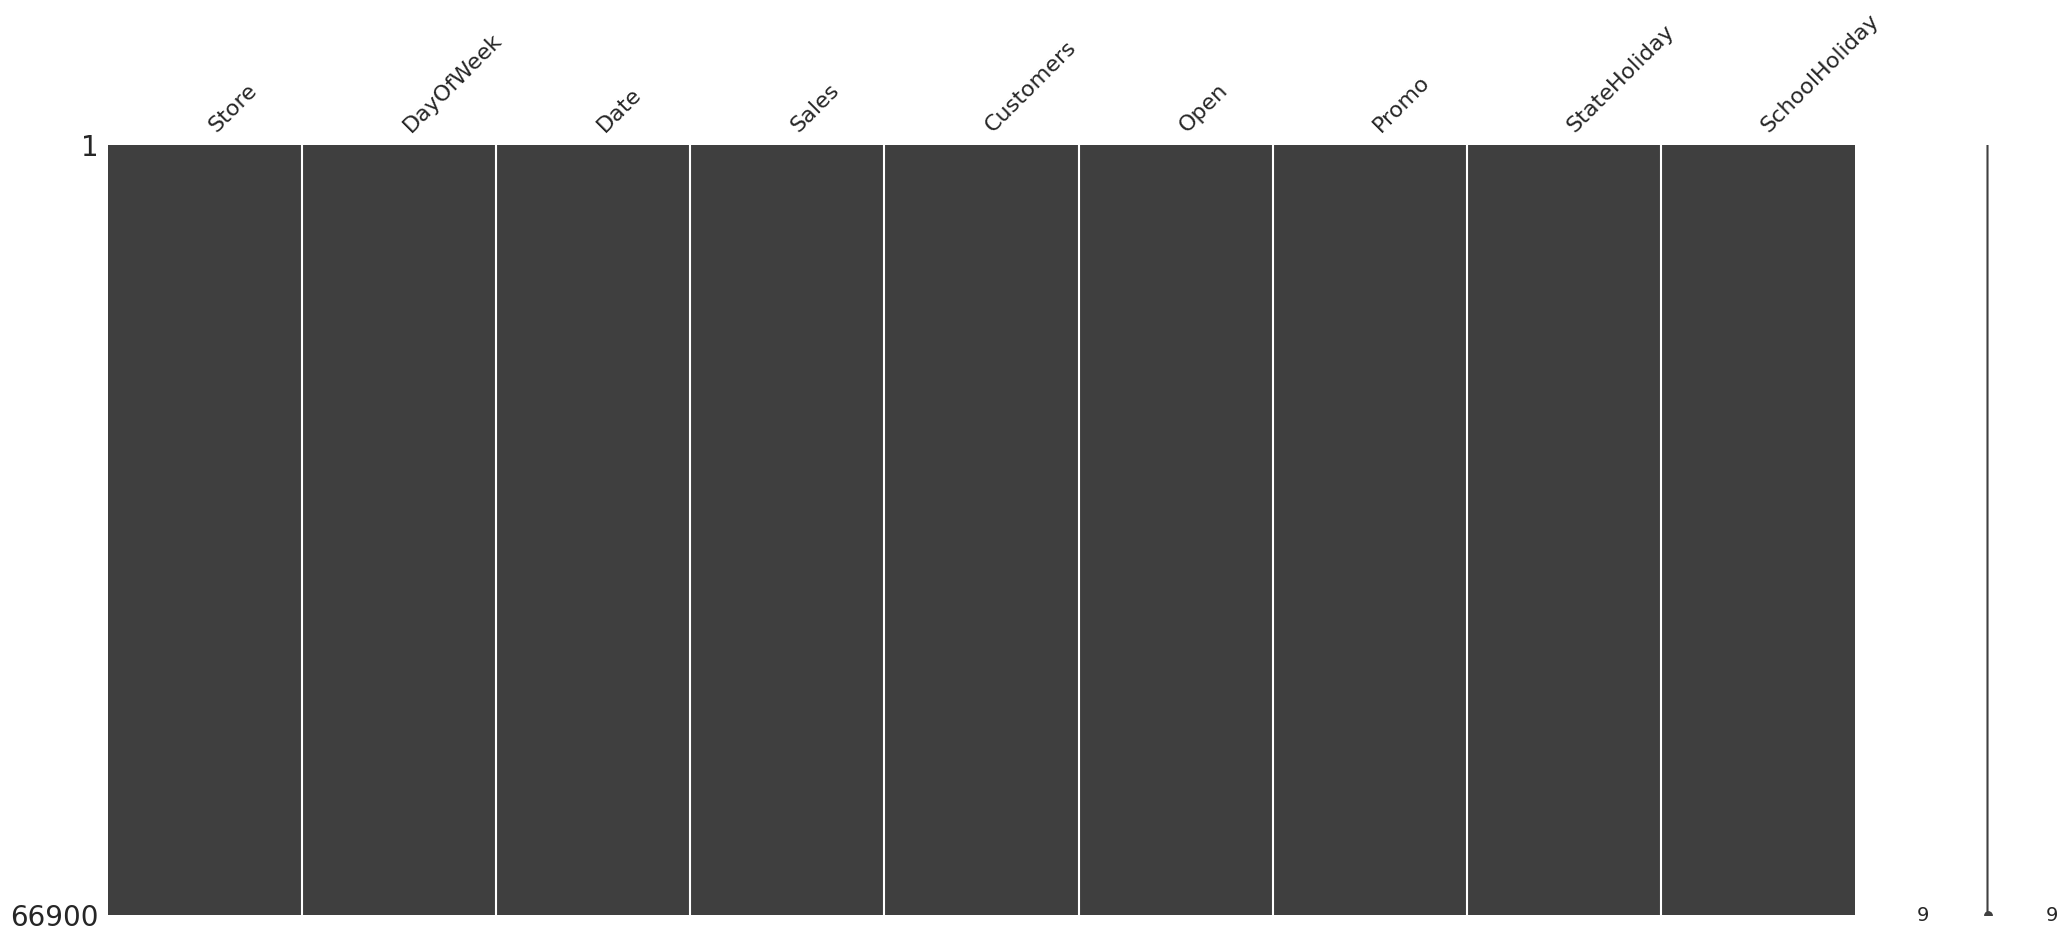

In [23]:
# Visualizing the missing values for sale
import missingno as msno
msno.matrix(sales_df)

<Axes: >

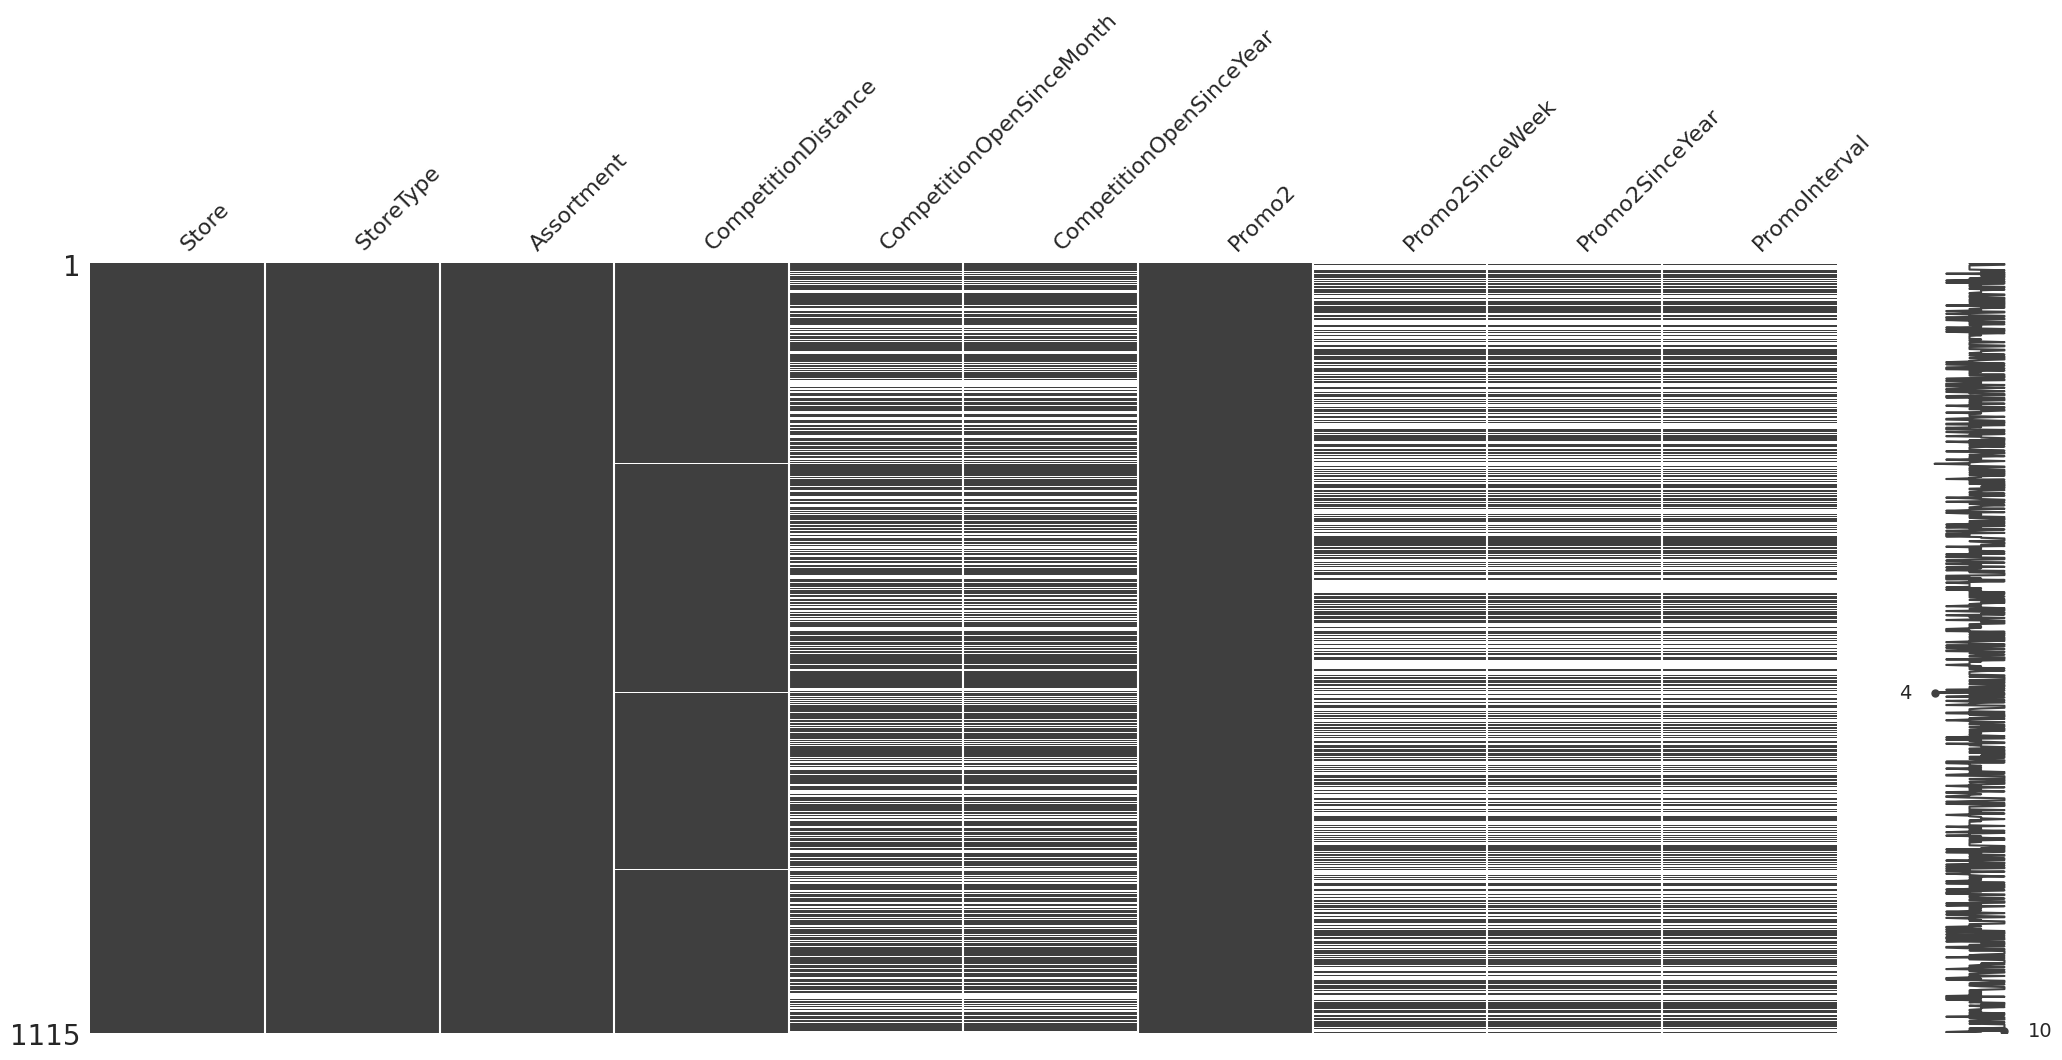

In [24]:
# Visualizing the missing values for store
import missingno as msno
msno.matrix(store_df)

# Understanding Your Variables

In [25]:
# overall row and columns
overall_number_of_row_and_columns = sales_df.shape
print(overall_number_of_row_and_columns)

(66900, 9)


In [26]:
# Dataset Columns
number_of_columns = len(sales_df.columns)
print(number_of_columns)

9


In [27]:
# Column names
sales_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [28]:
# Dataset Describe
sales_df.describe(include= 'all')
#distribution and range of the values in the dataset

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,66900.000000,66900.000000,66900,66900.000000,66900.000000,66900.000000,66900.000000,66900,66900.000000
unique,NaN,NaN,66,NaN,NaN,NaN,NaN,3,NaN
top,NaN,NaN,2015-01-30,NaN,NaN,NaN,NaN,0,NaN
freq,NaN,NaN,1115,NaN,NaN,NaN,NaN,63642,NaN
mean,557.916622,4.005830,NaN,6338.682167,661.512257,0.817459,0.428550,NaN,0.180433
std,321.544345,1.962357,NaN,4365.720737,497.418237,0.386293,0.494872,NaN,0.384551
min,1.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
25%,281.000000,2.000000,NaN,3859.000000,407.000000,1.000000,0.000000,NaN,0.000000
50%,557.000000,4.000000,NaN,6301.000000,635.000000,1.000000,0.000000,NaN,0.000000
75%,837.000000,6.000000,NaN,8768.000000,887.000000,1.000000,1.000000,NaN,0.000000


# Check Unique Values for each variable

In [29]:
# Check Unique Values for each variable

In [30]:
# Unique value of Sales
sales_df.nunique()

Store             1115
DayOfWeek            7
Date                66
Sales            13651
Customers         2638
Open                 2
Promo                2
StateHoliday         3
SchoolHoliday        2
dtype: int64

In [31]:
# Unique value of Store
store_df.nunique()

Store                        1115
StoreType                       4
Assortment                      3
CompetitionDistance           654
CompetitionOpenSinceMonth      12
CompetitionOpenSinceYear       23
Promo2                          2
Promo2SinceWeek                24
Promo2SinceYear                 7
PromoInterval                   3
dtype: int64

In [32]:
sales_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [33]:
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [34]:
# STORE DATASET FILL INTO NULL VALUES I.E 0
store_df['CompetitionDistance'] = store_df['CompetitionDistance'].fillna(0)
store_df['CompetitionOpenSinceMonth'] = store_df['CompetitionOpenSinceMonth'].fillna(0)
store_df['CompetitionOpenSinceYear'] = store_df['CompetitionOpenSinceYear'].fillna(0)
store_df['Promo2SinceWeek'] = store_df['Promo2SinceWeek'].fillna(0)
store_df['Promo2SinceYear'] = store_df['Promo2SinceYear'].fillna(0)
store_df['PromoInterval'] = store_df['PromoInterval'].fillna(0)

In [35]:
#count the number of missing values in each column
store_df.isna().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [36]:
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0
1112,1113,a,c,9260.0,0.0,0.0,0,0.0,0.0,0
1113,1114,a,c,870.0,0.0,0.0,0,0.0,0.0,0


## Data Wrangling Code

In [37]:
# Merge the two datasets based on the 'Store' column on left
total_df = pd.merge(sales_df, store_df, on= 'Store', how= 'left')
print("Data has been successfully merged")

Data has been successfully merged


In [38]:
total_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-01-30,5577,616,1,1,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-01-30,5919,624,1,1,0,0,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-01-30,6911,678,1,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-01-30,13307,1632,1,1,0,0,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-01-30,5640,617,1,1,0,0,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66895,864,3,2014-11-26,5156,626,1,1,0,0,a,a,1020.0,10.0,2012.0,1,45.0,2009.0,"Feb,May,Aug,Nov"
66896,865,3,2014-11-26,9337,646,1,1,0,0,d,c,2640.0,0.0,0.0,0,0.0,0.0,0
66897,866,3,2014-11-26,7973,479,1,1,0,0,d,a,9680.0,0.0,0.0,1,5.0,2013.0,"Feb,May,Aug,Nov"
66898,867,3,2014-11-26,5391,440,1,1,0,0,d,c,21810.0,9.0,2012.0,0,0.0,0.0,0


In [39]:
# change datatype object into date format
sales_df['Date'].unique()

array(['2015-01-30', '2015-01-29', '2015-01-28', '2015-01-27',
       '2015-01-26', '2015-01-25', '2015-01-24', '2015-01-23',
       '2015-01-22', '2015-01-21', '2015-01-20', '2015-01-19',
       '2015-01-18', '2015-01-17', '2015-01-16', '2015-01-15',
       '2015-01-14', '2015-01-13', '2015-01-12', '2015-01-11',
       '2015-01-10', '2015-01-09', '2015-01-08', '2015-01-07',
       '2015-01-06', '2015-01-05', '2015-01-04', '2015-01-03',
       '2015-01-02', '2015-01-01', '2014-12-31', '2014-12-30',
       '2014-12-29', '2014-12-28', '2014-12-27', '2014-12-26',
       '2014-12-25', '2014-12-24', '2014-12-23', '2014-12-22',
       '2014-12-21', '2014-12-20', '2014-12-19', '2014-12-18',
       '2014-12-17', '2014-12-16', '2014-12-15', '2014-12-14',
       '2014-12-13', '2014-12-12', '2014-12-11', '2014-12-10',
       '2014-12-09', '2014-12-08', '2014-12-07', '2014-12-06',
       '2014-12-05', '2014-12-04', '2014-12-03', '2014-12-02',
       '2014-12-01', '2014-11-30', '2014-11-29', '2014-

In [40]:
li = ["DayOfWeek", "StateHoliday", "SchoolHoliday"]

for i in li:
  print(i)
  print(total_df[i].unique())
  print("------------------------")

DayOfWeek
[5 4 3 2 1 7 6]
------------------------
StateHoliday
['0' 'a' 'c']
------------------------
SchoolHoliday
[0 1]
------------------------


In [41]:
total_df['StateHoliday'].unique()

array(['0', 'a', 'c'], dtype=object)

In [42]:
#Change data types object to int
total_df.loc[total_df['StateHoliday'] == '0', 'StateHoliday'] = 0
total_df.loc[total_df['StateHoliday'] == 'a', 'StateHoliday'] = 1
total_df.loc[total_df['StateHoliday'] == 'c', 'StateHoliday'] = 2
#store the value with same column name i.e StateHoliday with function astype
total_df['StateHoliday'] = total_df['StateHoliday'].astype(int, copy=False)

In [43]:
total_df['Assortment'].unique()

array(['a', 'c', 'b'], dtype=object)

In [44]:
#Change data types object to int
total_df.loc[total_df['Assortment'] == 'a', 'Assortment'] = 0
total_df.loc[total_df['Assortment'] == 'b', 'Assortment'] = 1
total_df.loc[total_df['Assortment'] == 'c', 'Assortment'] = 2
#store the value with same column name i.e StateHoliday with function astype
total_df['Assortment'] = total_df['Assortment'].astype(int, copy=False)

In [45]:
total_df['StoreType'].unique()

array(['c', 'a', 'd', 'b'], dtype=object)

In [46]:
#Change data types object to int
total_df.loc[total_df['StoreType'] == 'a', 'StoreType'] = 0
total_df.loc[total_df['StoreType'] == 'b', 'StoreType'] = 1
total_df.loc[total_df['StoreType'] == 'c', 'StoreType'] = 2
total_df.loc[total_df['StoreType'] == 'd', 'StoreType'] = 3
#store the value with same column name i.e StateHoliday with function astype
total_df['StoreType'] = total_df['StoreType'].astype(int, copy=False)

In [47]:
print(total_df[['StateHoliday', 'Assortment', 'StoreType']].nunique())

StateHoliday    3
Assortment      3
StoreType       4
dtype: int64


In [48]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66900 entries, 0 to 66899
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      66900 non-null  int64  
 1   DayOfWeek                  66900 non-null  int64  
 2   Date                       66900 non-null  object 
 3   Sales                      66900 non-null  int64  
 4   Customers                  66900 non-null  int64  
 5   Open                       66900 non-null  int64  
 6   Promo                      66900 non-null  int64  
 7   StateHoliday               66900 non-null  int64  
 8   SchoolHoliday              66900 non-null  int64  
 9   StoreType                  66900 non-null  int64  
 10  Assortment                 66900 non-null  int64  
 11  CompetitionDistance        66900 non-null  float64
 12  CompetitionOpenSinceMonth  66900 non-null  float64
 13  CompetitionOpenSinceYear   66900 non-null  flo

In [49]:
total_df["Sales"].value_counts()

Sales
0        12212
5313        18
5723        18
5818        17
6410        17
         ...  
1908         1
14618        1
11689        1
17948        1
25341        1
Name: count, Length: 13651, dtype: int64

In [50]:
# code for changing format of date from object to datetime
total_df['Date'] = pd.to_datetime(total_df['Date'], format= '%Y-%m-%d')

In [51]:
# code for change object into date format
total_df['CompetitionOpenSinceMonth'] = pd.DatetimeIndex(total_df['Date']).month

In [52]:
# code for change float into integer
total_df['CompetitionOpenSinceYear'] = total_df['CompetitionOpenSinceYear'].astype(int)
total_df['Promo2SinceYear'] = total_df['Promo2SinceYear'].astype(int)

In [53]:
# code for change float into integer
total_df['CompetitionDistance'] = total_df['CompetitionDistance'].astype(int)
total_df['Promo2SinceWeek'] = total_df['Promo2SinceWeek'].astype(int)

In [54]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66900 entries, 0 to 66899
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Store                      66900 non-null  int64         
 1   DayOfWeek                  66900 non-null  int64         
 2   Date                       66900 non-null  datetime64[ns]
 3   Sales                      66900 non-null  int64         
 4   Customers                  66900 non-null  int64         
 5   Open                       66900 non-null  int64         
 6   Promo                      66900 non-null  int64         
 7   StateHoliday               66900 non-null  int64         
 8   SchoolHoliday              66900 non-null  int64         
 9   StoreType                  66900 non-null  int64         
 10  Assortment                 66900 non-null  int64         
 11  CompetitionDistance        66900 non-null  int64         
 12  Comp

# 4. data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables

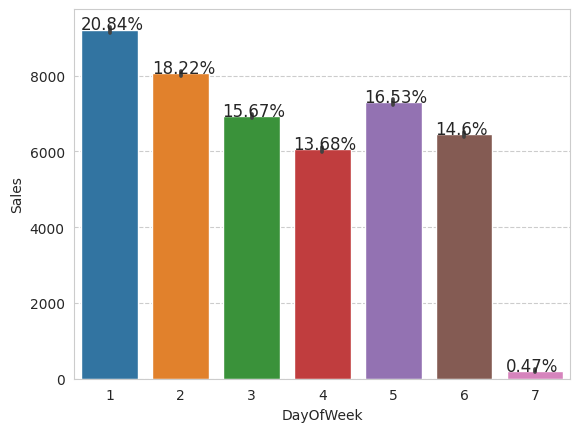

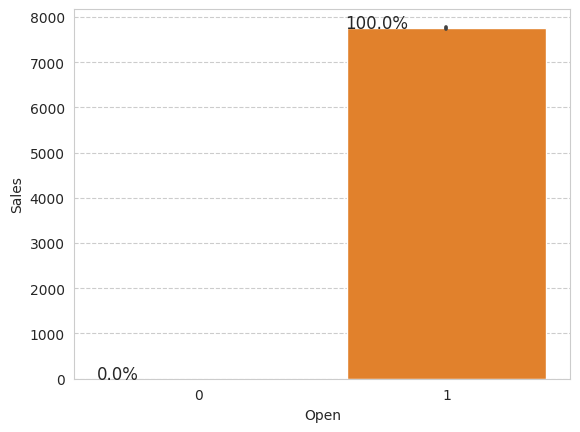

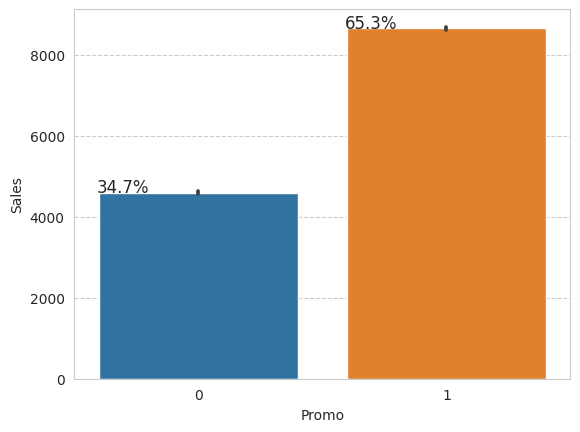

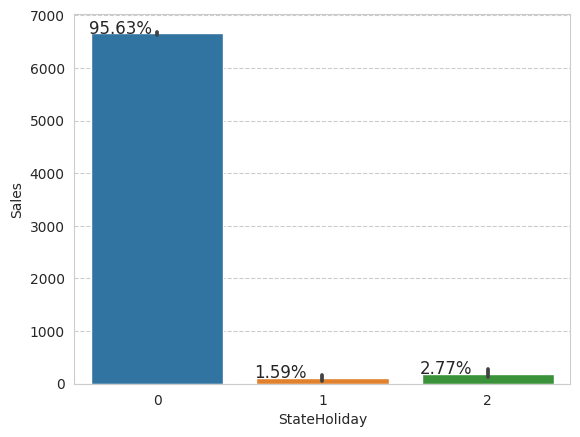

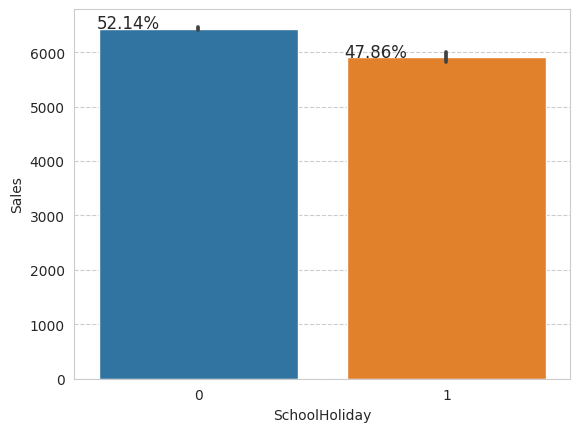

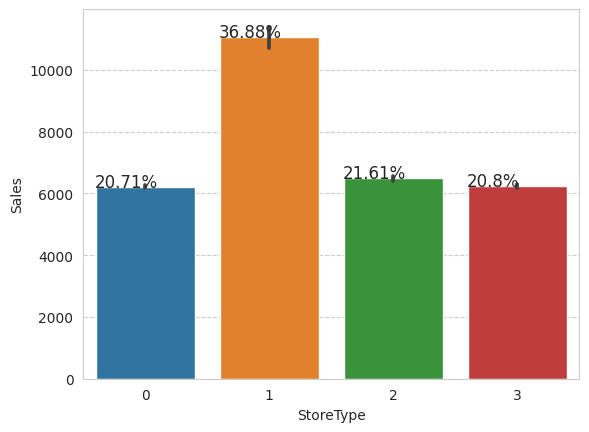

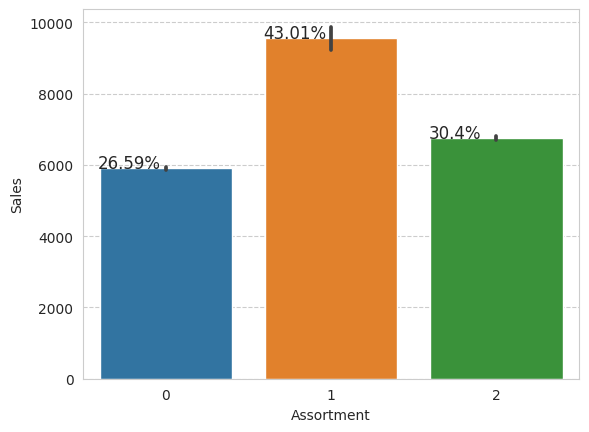

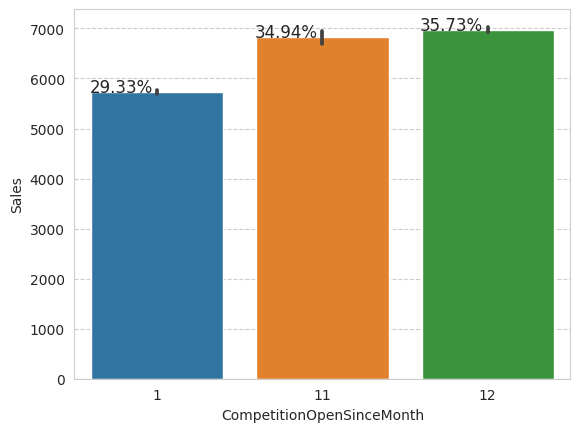

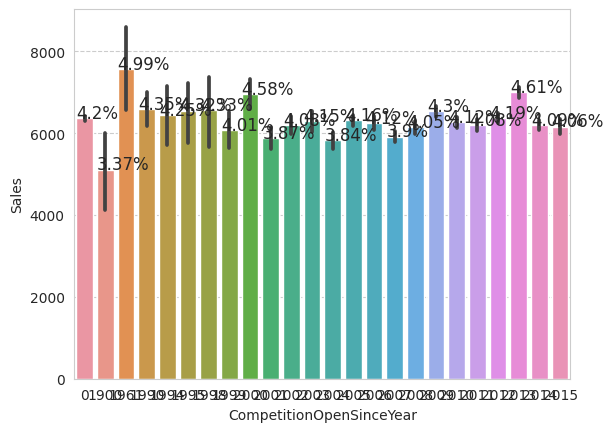

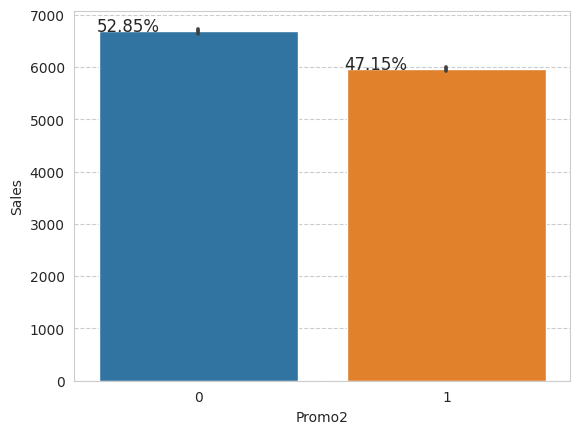

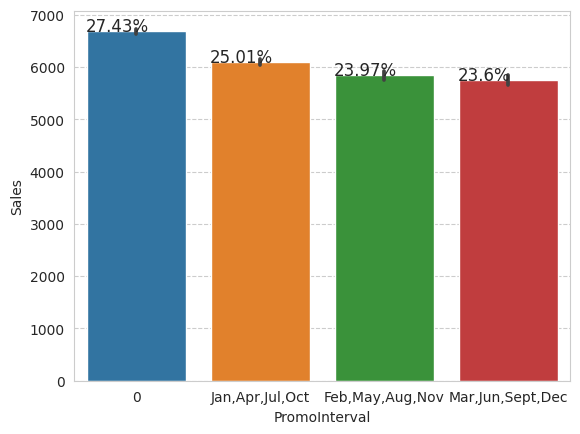

In [55]:
# Chart - 1 visualization code
# code for barplots of the categorical variables against sales
#iterating over the categorical variables and plotting each of them
categorical_variables = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment',
                         'CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2','PromoInterval']
for value in categorical_variables:
  ax = sns.barplot(x=total_df[value], y=total_df['Sales'])
  totals = []
  for i in ax.patches: # for every patch in the barplot ax
      totals.append(i.get_height()) #append height for each patch

  total = sum(totals) #sum of each patch height for a plot

  for i in ax.patches:
      ax.text(i.get_x() - .01, i.get_height() + .5, \
              str(round((i.get_height()/total)*100, 2))+'%', fontsize=12) #text position and formula for percentage
  plt.show()


# Correlation Heatmap



In [56]:
# Assuming total_df is your DataFrame
# Drop "PromoInterval" temporarily
total_df_temp = total_df.drop("PromoInterval", axis=1)


In [57]:
# Correlation Heatmap visualization code

<Axes: >

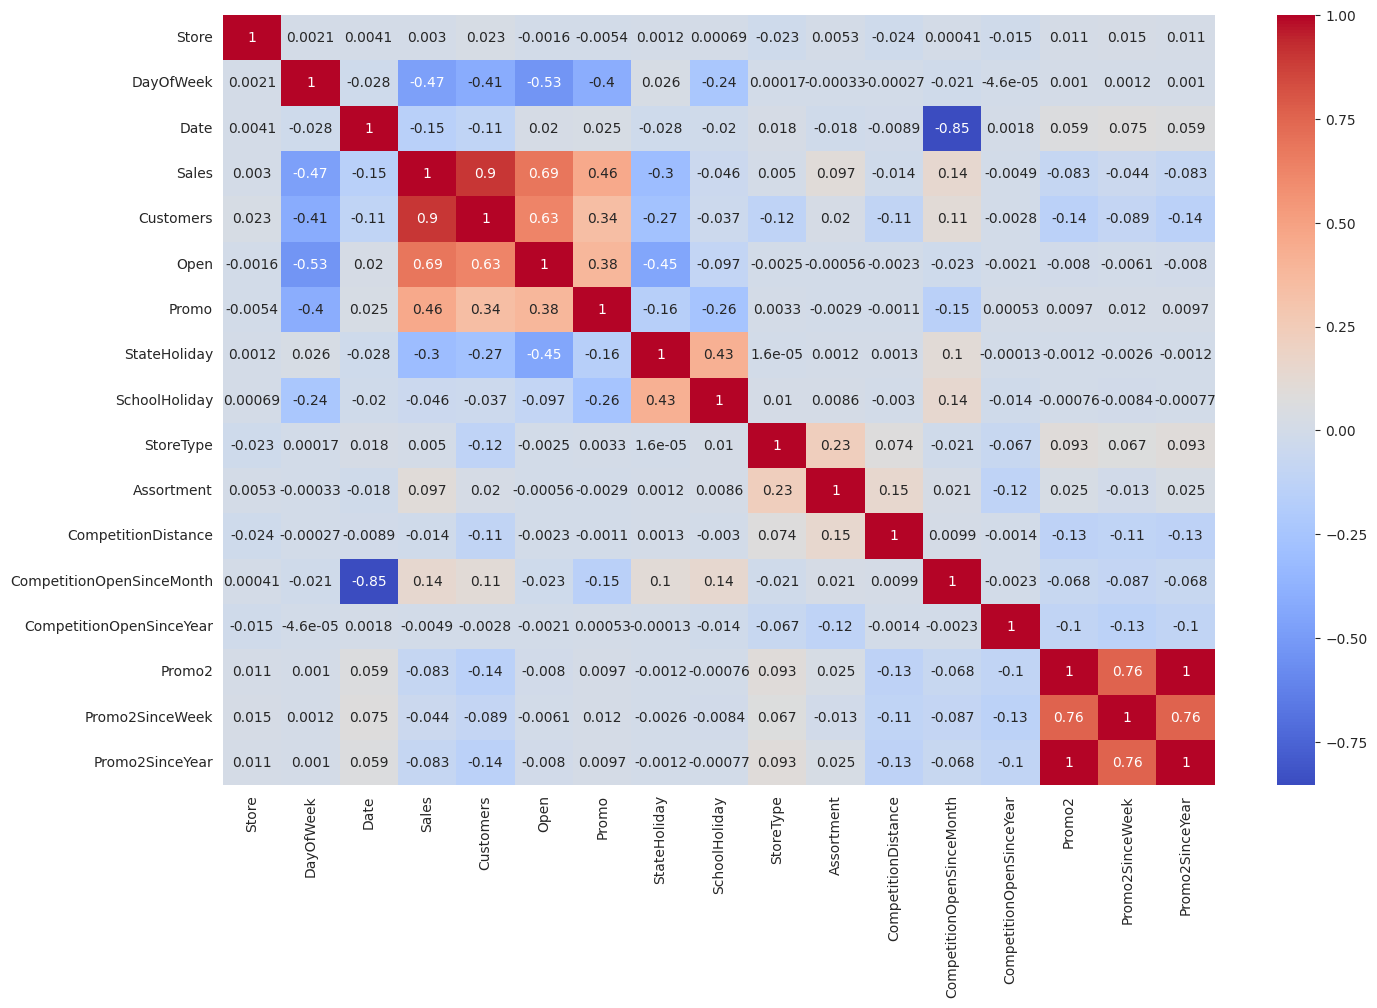

In [58]:
#correlation heatmap
plt.figure(figsize=(16,10))
sns.heatmap(total_df_temp.corr(), cmap="coolwarm", annot=True)

# Pair Plot How do different features(such as Customers, Promo, DayOfWeek, etc.) relate to the Sales target variable in the dataset?

In [59]:
# Pair Plot visualization code

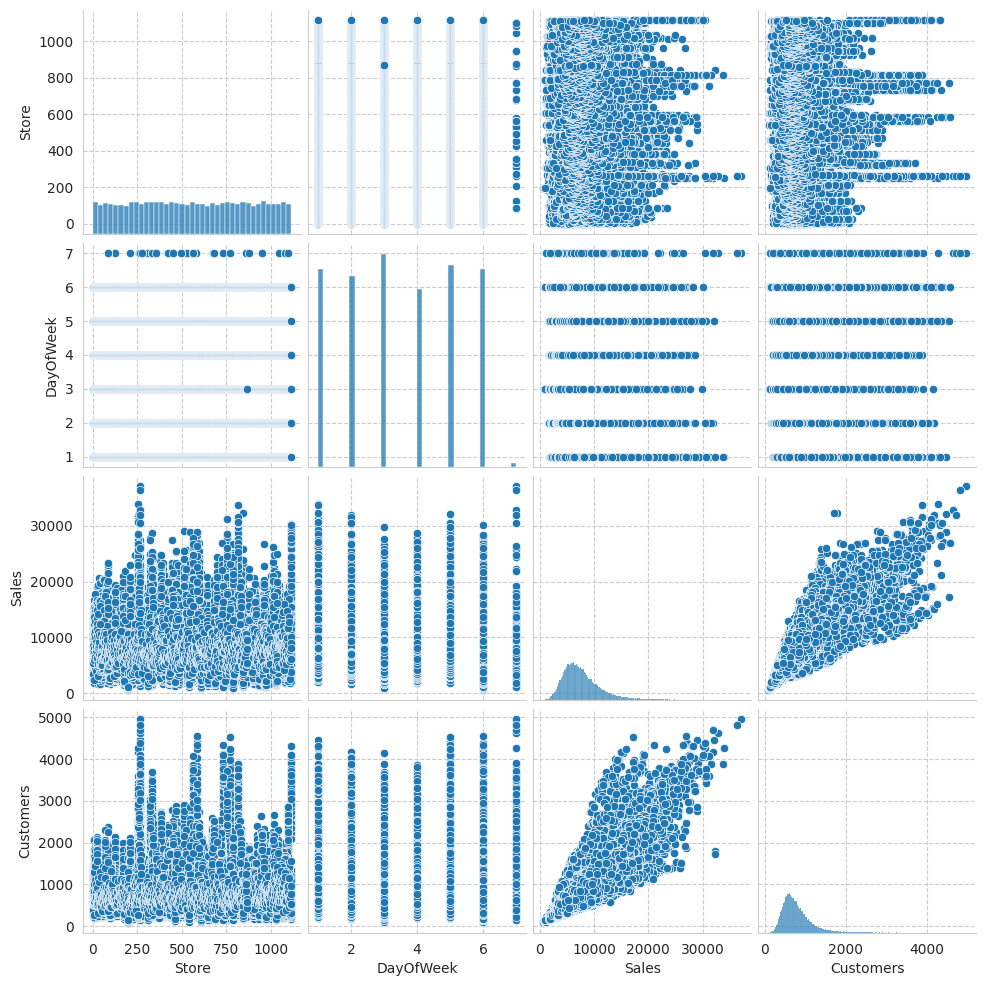

In [60]:
# Filter out the stores with zero sales
corr_df = total_df[total_df['Sales']>0]

#Create a pairplot
sns.pairplot(corr_df[['Store','DayOfWeek','Sales','Customers']])

# Feature Engineering & Data Pre-processing

<Axes: >

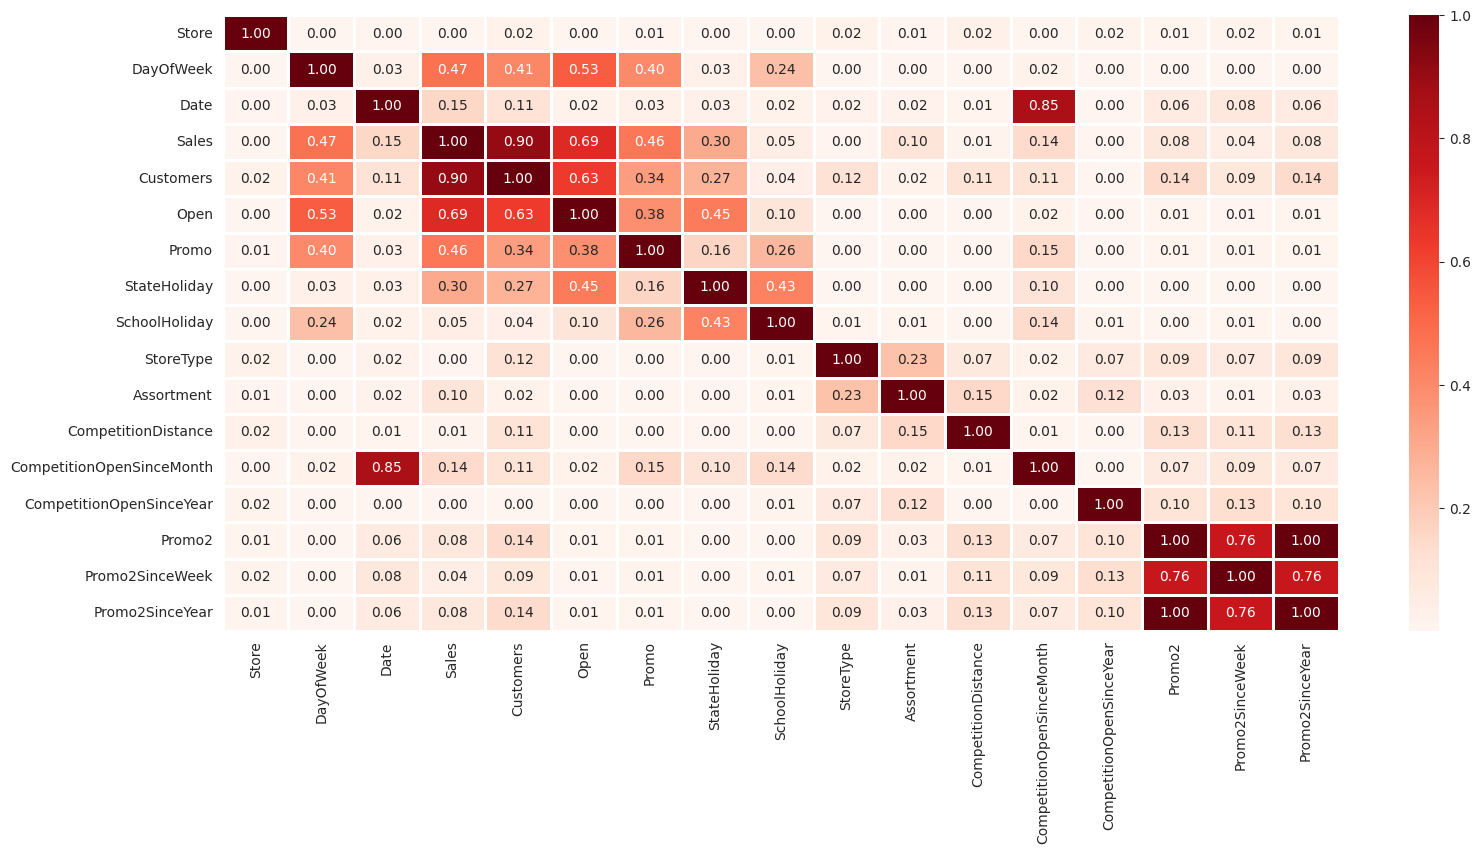

In [61]:
#plotting correlation heatmap for better understanding of data
# The intensity of color represents strength of correlation
plt.figure(figsize=(18,8))
correlation = total_df_temp.corr()
sns.heatmap(abs(correlation), annot=True, cmap='Reds',linewidths=2,fmt=".2f")

# Analysis of Target Variable i.e 'Sales'.

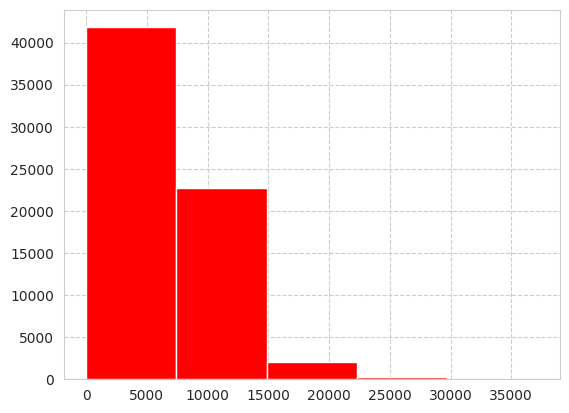

In [62]:
# Create a histogram of the 'Sales' column from the DataFrame 'total_df'.
pd.Series(total_df['Sales'],).hist(bins=5, color="red")
plt.show()

In [63]:
total_df[(total_df.Open == 0) & (total_df.Sales == 0)].count()[0]

12212

## So we will drop those store which sales is 0 assuming that the stores were closed temporarily and this will help to train the model more accurately.

In [64]:
# Filtering and dropping rows where both 'Open' and 'Sales' are 0
new_df = total_df.drop(total_df[(total_df.Open == 0) & (total_df.Sales == 0)].index)

In [65]:
new_df.shape

(54688, 18)

In [67]:
new_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-01-30,5577,616,1,1,0,0,2,0,1270,1,2008,0,0,0,0
1,2,5,2015-01-30,5919,624,1,1,0,0,0,0,570,1,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,5,2015-01-30,6911,678,1,1,0,0,0,0,14130,1,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,5,2015-01-30,13307,1632,1,1,0,0,2,2,620,1,2009,0,0,0,0
4,5,5,2015-01-30,5640,617,1,1,0,0,0,0,29910,1,2015,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66895,864,3,2014-11-26,5156,626,1,1,0,0,0,0,1020,11,2012,1,45,2009,"Feb,May,Aug,Nov"
66896,865,3,2014-11-26,9337,646,1,1,0,0,3,2,2640,11,0,0,0,0,0
66897,866,3,2014-11-26,7973,479,1,1,0,0,3,0,9680,11,0,1,5,2013,"Feb,May,Aug,Nov"
66898,867,3,2014-11-26,5391,440,1,1,0,0,3,2,21810,11,2012,0,0,0,0


## In new_df dataset name 'PromoInterval' change into dummies it means that each new column will have a binary value (0 or 1).

In [68]:
# Perform one-hot encoding on the 'PromoInterval' column of the DataFrame 'new_df'
new_df = pd.get_dummies(new_df, columns=['PromoInterval'])

In [69]:
# Define the columns to convert
columns_to_convert = ['PromoInterval_0', 'PromoInterval_Feb,May,Aug,Nov', 'PromoInterval_Jan,Apr,Jul,Oct', 'PromoInterval_Mar,Jun,Sept,Dec']

# Convert specified columns to integers (0 or 1)
new_df[columns_to_convert] = new_df[columns_to_convert].applymap(lambda x: 1 if x else 0)

In [71]:
new_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,5,2015-01-30,5577,616,1,1,0,0,2,...,1270,1,2008,0,0,0,1,0,0,0
1,2,5,2015-01-30,5919,624,1,1,0,0,0,...,570,1,2007,1,13,2010,0,0,1,0
2,3,5,2015-01-30,6911,678,1,1,0,0,0,...,14130,1,2006,1,14,2011,0,0,1,0
3,4,5,2015-01-30,13307,1632,1,1,0,0,2,...,620,1,2009,0,0,0,1,0,0,0
4,5,5,2015-01-30,5640,617,1,1,0,0,0,...,29910,1,2015,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66895,864,3,2014-11-26,5156,626,1,1,0,0,0,...,1020,11,2012,1,45,2009,0,1,0,0
66896,865,3,2014-11-26,9337,646,1,1,0,0,3,...,2640,11,0,0,0,0,1,0,0,0
66897,866,3,2014-11-26,7973,479,1,1,0,0,3,...,9680,11,0,1,5,2013,0,1,0,0
66898,867,3,2014-11-26,5391,440,1,1,0,0,3,...,21810,11,2012,0,0,0,1,0,0,0


In [72]:
new_df.to_csv('cleandata.csv', index=False)

# Hypothesis Testing
#### Hypothetical Statement-1
# MODEL 1 (excluding rows which has sales =0)
#### Hypothetical Statement-2
# MODEL 2 (By taking whole Dataset)

# ML Model Implementation

In [73]:
from scipy.stats import zscore
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score as r2, mean_squared_error as mse
import math
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix,classification_report


## ML Model - 1 (excluding rows which has sales =0)

####As we have two dataset,first one having sales = '0' rows and another excluding it.We will both the data and find the best model.First We will take dataset excluding Sales = '0' rows.

In [74]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

In [75]:
# deffining dependent variable
dependent_variables = 'Sales'

# defining independent variable
independent_variables = list(new_df.columns.drop(['Promo2SinceYear','Date','Sales']))

In [76]:
# List of Independent Variable
independent_variables



['Store',
 'DayOfWeek',
 'Customers',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'StoreType',
 'Assortment',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'PromoInterval_0',
 'PromoInterval_Feb,May,Aug,Nov',
 'PromoInterval_Jan,Apr,Jul,Oct',
 'PromoInterval_Mar,Jun,Sept,Dec']

In [77]:
# Create the data of independent variables
X = new_df[independent_variables].values

# Create the data of dependent variable
y = new_df[dependent_variables].values

In [78]:
# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(43750, 18)
(10938, 18)


In [79]:
# Here we Train the model
reg = LinearRegression().fit(X_train, y_train)

In [80]:
#Predicting Dependent Variable with Test Dataset i.e 20%
y_pred = reg.predict(X_test)
y_pred

array([8792.95908111, 9111.21165632, 9636.05877967, ..., 3121.95034367,
       6211.90762743, 5971.05243159])

In [81]:
# Original Test Dependent Value
y_test

array([ 5924, 12151, 13433, ...,  3579,  6149,  5080])

In [82]:
#Predicting on Train Dataset
y_pred_train = reg.predict(X_train)
y_pred_train


array([ 6481.1256715 ,  7326.69995629, 11100.94919116, ...,
        6882.05725233,  6965.85749391,  5673.70559901])

In [83]:
# Dependent Variable with Train Dataset i.e 80%
y_train

array([ 5668,  4985, 12007, ...,  5709,  5247,  5425])

In [84]:
# true target values (y_test) and the corresponding predicted values (y_pred) side by side.
pd.DataFrame(zip(y_test, y_pred), columns = ['actual', 'pred'])

,actual,pred
0,5924,8792.959081
1,12151,9111.211656
2,13433,9636.058780
3,10183,9094.401332
4,6117,6276.267921
...,...,...
10933,7176,8022.257443
10934,10664,8680.872658
10935,3579,3121.950344
10936,6149,6211.907627


In [85]:
from sklearn import metrics
#calculating the residuals
print('y-intercept             :' , reg.intercept_)
print('beta coefficients       :' , reg.coef_)
print('Mean Abs Error MAE      :' ,metrics.mean_absolute_error(y_test,y_pred))
print('Mean Sqrt Error MSE     :' ,metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Sqrt Error RMSE:' ,np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('r2 value                :' ,metrics.r2_score(y_test,y_pred))

y-intercept             : 208.83596655092333
beta coefficients       : [-1.86065714e-01 -6.25424702e+01  6.71906616e+00 -4.64193128e-11
  1.40913823e+03 -1.37708177e+03  2.94061188e+02  3.02899050e+02
  3.16047544e+02  3.97944464e-02  8.23939752e+01  8.41143033e-02
  1.63396338e+01  1.05654781e+01 -1.63396338e+01  5.30453922e+01
  1.54871425e+02 -1.91577183e+02]
Mean Abs Error MAE      : 1116.3182501129368
Mean Sqrt Error MSE     : 2538399.413702326
Root Mean Sqrt Error RMSE: 1593.2355173364438
r2 value                : 0.7940391750679345


# Decision Tree

In [86]:
sales_mean = total_df[dependent_variables].mean()

In [87]:
sales_mean

6338.682167414051

In [88]:
sales_mean_new=new_df[dependent_variables].mean()

In [89]:
# Decision Tree's
decision_tree=DecisionTreeRegressor(max_depth=5)
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)
y_train_dt = decision_tree.predict(X_train)
#print('dt_regressor R^2: ', r2(v_test,v_pred))
MSE = mean_squared_error(y_test, y_pred_dt)
print("MSE :", MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

RMPSE = RMSE/sales_mean_new
print("RMPSE :",RMPSE)

r2 = r2_score(y_test, y_pred_dt)
print("R2 :",r2)

MSE : 2348570.3518694662
RMSE : 1532.5046009292978
RMPSE : 0.1976372190372264
R2 : 0.8094415384470497


# ML Model - 2 (By taking whole Dataset)
****In final1 dataset,column name 'PromoInterval' change into dummies it means that each new column will have a binary value (0 or 1).****

In [90]:
total_df = pd.get_dummies(total_df, columns=['PromoInterval'])

In [91]:
total_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,5,2015-01-30,5577,616,1,1,0,0,2,...,1270,1,2008,0,0,0,True,False,False,False
1,2,5,2015-01-30,5919,624,1,1,0,0,0,...,570,1,2007,1,13,2010,False,False,True,False
2,3,5,2015-01-30,6911,678,1,1,0,0,0,...,14130,1,2006,1,14,2011,False,False,True,False
3,4,5,2015-01-30,13307,1632,1,1,0,0,2,...,620,1,2009,0,0,0,True,False,False,False
4,5,5,2015-01-30,5640,617,1,1,0,0,0,...,29910,1,2015,0,0,0,True,False,False,False


****We define dependent and independent variables and convert them into arrays****

In [92]:
# defining dependent variable
dep_var = 'Sales'

# defining independent variable
indep_var = total_df.columns.drop(['Store', 'Promo2SinceYear', 'Date', 'Sales'])

In [93]:
indep_var

Index(['DayOfWeek', 'Customers', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'PromoInterval_0', 'PromoInterval_Feb,May,Aug,Nov',
       'PromoInterval_Jan,Apr,Jul,Oct', 'PromoInterval_Mar,Jun,Sept,Dec'],
      dtype='object')

In [94]:
# Create the data of independent variables
U = total_df[indep_var].values
# Create the dependent variable data
V = total_df[dep_var].values

In [95]:
U

array([[5, 616, 1, ..., False, False, False],
       [5, 624, 1, ..., False, True, False],
       [5, 678, 1, ..., False, True, False],
       ...,
       [3, 479, 1, ..., True, False, False],
       [3, 440, 1, ..., False, False, False],
       [3, 579, 1, ..., False, True, False]], dtype=object)

In [96]:
V

array([5577, 5919, 6911, ..., 7973, 5391, 9478])

In [97]:
total_df[indep_var]

,DayOfWeek,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,5,616,1,1,0,0,2,0,1270,1,2008,0,0,True,False,False,False
1,5,624,1,1,0,0,0,0,570,1,2007,1,13,False,False,True,False
2,5,678,1,1,0,0,0,0,14130,1,2006,1,14,False,False,True,False
3,5,1632,1,1,0,0,2,2,620,1,2009,0,0,True,False,False,False
4,5,617,1,1,0,0,0,0,29910,1,2015,0,0,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66895,3,626,1,1,0,0,0,0,1020,11,2012,1,45,False,True,False,False
66896,3,646,1,1,0,0,3,2,2640,11,0,0,0,True,False,False,False
66897,3,479,1,1,0,0,3,0,9680,11,0,1,5,False,True,False,False
66898,3,440,1,1,0,0,3,2,21810,11,2012,0,0,True,False,False,False


In [98]:
# splitting the dataset
U_train, U_test, V_train, V_test = train_test_split(U, V, test_size=0.2, random_state = 0)
print(U_train.shape)
print(U_test.shape)

(53520, 17)
(13380, 17)


# LINEAR REGRESSION

In [99]:
# scaling the x values
scaler=StandardScaler()

U_train = scaler.fit_transform(U_train)
U_test = scaler.transform(U_test)

In [100]:
# fitting the data into Linear Regression Model
linear_regression = LinearRegression()
linear_regression.fit(U_train, V_train)

LinearRegression()

In [101]:
# Use the trained linear regression model to make predictions on the test datset 'U_test'.
V_pred=linear_regression.predict(U_test)
V_pred

array([11098.37120885,  2406.3282401 ,  6403.98553882, ...,
         -22.8748849 ,  9691.12120885,  8579.8907401 ])

In [102]:
linear_regression.score(U_train, V_train)

0.88421463533659

In [103]:
regression_Dataframe = pd.DataFrame(zip(V_test, V_pred), columns = ['actual', 'pred'])
regression_Dataframe

,actual,pred
0,15202,11098.371209
1,1872,2406.328240
2,7085,6403.985539
3,7870,7536.625115
4,10161,11461.714959
...,...,...
13375,0,-639.699104
13376,7043,8285.992303
13377,0,-22.874885
13378,8836,9691.121209


In [104]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(V_test, V_pred)
print("MSE :", MSE)

RMSE = np.sqrt(MSE)
print("RMSE :", RMSE)

RMPSE=RMSE/sales_mean
print("RMPSE :",RMPSE)

r2 = r2_score(V_test, V_pred)
print("R2 :" ,r2)

MSE : 2180593.230700335
RMSE : 1476.6831856225408
RMPSE : 0.2329637528150387
R2 : 0.881550432030016


# DECISION TREE

In [105]:
# Decision Tree regression model to predict the target variable
decision_tree=DecisionTreeRegressor(max_depth=5)
decision_tree.fit (U_train, V_train)
V_pred_dt = decision_tree.predict(U_test)
V_train_dt = decision_tree.predict(U_train)
#print('dt_regressor R^2: ', r2(V_test, V_pred)
MSE = mean_squared_error(V_test, V_pred_dt)
print("MSE :", MSE)

RMSE = np.sqrt(MSE)
print("RMSE :", RMSE)

RMPSE = RMSE/sales_mean
print("RMPSE :",RMPSE)

r2 = r2_score(V_test, V_pred_dt)
print("R2 :", r2)

MSE : 2122578.8613565722
RMSE : 1456.9072933294597
RMPSE : 0.22984387840411696
R2 : 0.8847017657533685


In [107]:
# creating a Dataframe containing the true target values (V_test) and the corresponding predicted values (V_pred_dt) side by side
decisiontree_Dataframe = pd.DataFrame(zip(V_test, V_pred_dt), columns = ['actual', 'pred'])
decisiontree_Dataframe

,actual,pred
0,15202,9962.112168
1,1872,2447.063218
2,7085,7658.460312
3,7870,6301.690240
4,10161,13940.709814
...,...,...
13375,0,0.000000
13376,7043,8432.608519
13377,0,0.000000
13378,8836,9962.112168


# Random Forest

In [110]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Create a random forest regressor with n_estimator=500, max_depth=8, and n_jobs=2
random_forest = RandomForestRegressor(n_estimators=500, max_depth=8, n_jobs=2)

#Fit the random to the training data
random_forest.fit(U_train, V_train)

# Make the predictions on the test data
V_pred_rf = random_forest.predict(U_test)

# Caluclate the mean squared error (MSE) between the predicted and actual values
MSE = mean_squared_error(V_test, V_pred_rf)
print("MSE :", MSE)

# Caluclate the root mean squared error (RMSE)
RMSE = np.sqrt(MSE)
print("RMSE :", RMSE)

# Caluclate the root mean percentage squared error (RMPSE)
sales_mean = np.mean(V_test)
RMPSE = RMSE / sales_mean
print("RMPSE :", RMPSE)

# Caluclate the coefficient of determination (r2_score)
r2 = r2_score(V_test, V_pred_rf)
print("R2 :", r2)

MSE : 1222498.0832237827
RMSE : 1105.6663525782915
RMPSE : 0.1737627766239424
R2 : 0.9335940478199668


# ADA BOOST

In [113]:
from sklearn.ensemble import AdaBoostRegressor
adaboost = AdaBoostRegressor(n_estimators=500, learning_rate=0.01)
adaboost.fit(U_train, V_train)
V_pred_ada = adaboost.predict(U_test)
MSE = mean_squared_error(V_test, V_pred_ada)
print("MSE :", MSE)

RMSE = np.sqrt(MSE)
print("RMSE :", RMSE)

RMPSE = RMSE/sales_mean
print("RMPSE :",RMPSE)

r2 = r2_score(V_test, V_pred_ada)
print("R2 :", r2)

MSE : 2503155.5655783657
RMSE : 1582.136392849354
RMPSE : 0.24864319329083107
R2 : 0.8640288839155972


# XGBOOST

In [114]:
import xgboost as xgb
xgboost = xgb.XGBRegressor(n_estimators=500, max_depth=8, n_jobs=2)
xgboost.fit(U_train, V_train)
V_pred_xgb = xgboost.predict(U_test)
MSE = mean_squared_error(V_test, V_pred_xgb)
print("MSE :", MSE)

RMSE = np.sqrt(MSE)
print("RMSE :", RMSE)

RMPSE = RMSE/sales_mean
print("RMPSE :",RMPSE)

r2 = r2_score(V_test, V_pred_xgb)
print("R2 :", r2)

MSE : 252241.39668085813
RMSE : 502.23639521729024
RMPSE : 0.0789297696823749
R2 : 0.9862982769824534


# Conclusion
**Removing sales=0 rows actually removes a lot of information from dataset as it has 12212 rows which is quite large and therefore we decided not to remove those vaolues.We got our best rmpse from RandomForest,Gradient boosting techniques like adaboost,xgboost,we tried taking an optimum parameter so that our model doesnt overfit.**